In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gdp
from pyswmm import Simulation, Nodes, Links
import shapely as shp
from shapely.ops import nearest_points, unary_union
import pandas as pd

/Users/niranjan/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/_1/mh7vhs1d5zz3475l0s3f31ww0000gn/T/ipykernel_2540/2448138962.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should

In [2]:
df_A = gdp.read_file('A_HYDROGRAPHY.gpkg')

In [3]:
df_L = gdp.read_file('L_HYDROGRAPHY.gpkg')

Text(14.940369946543058, 0.5, 'Longitude')

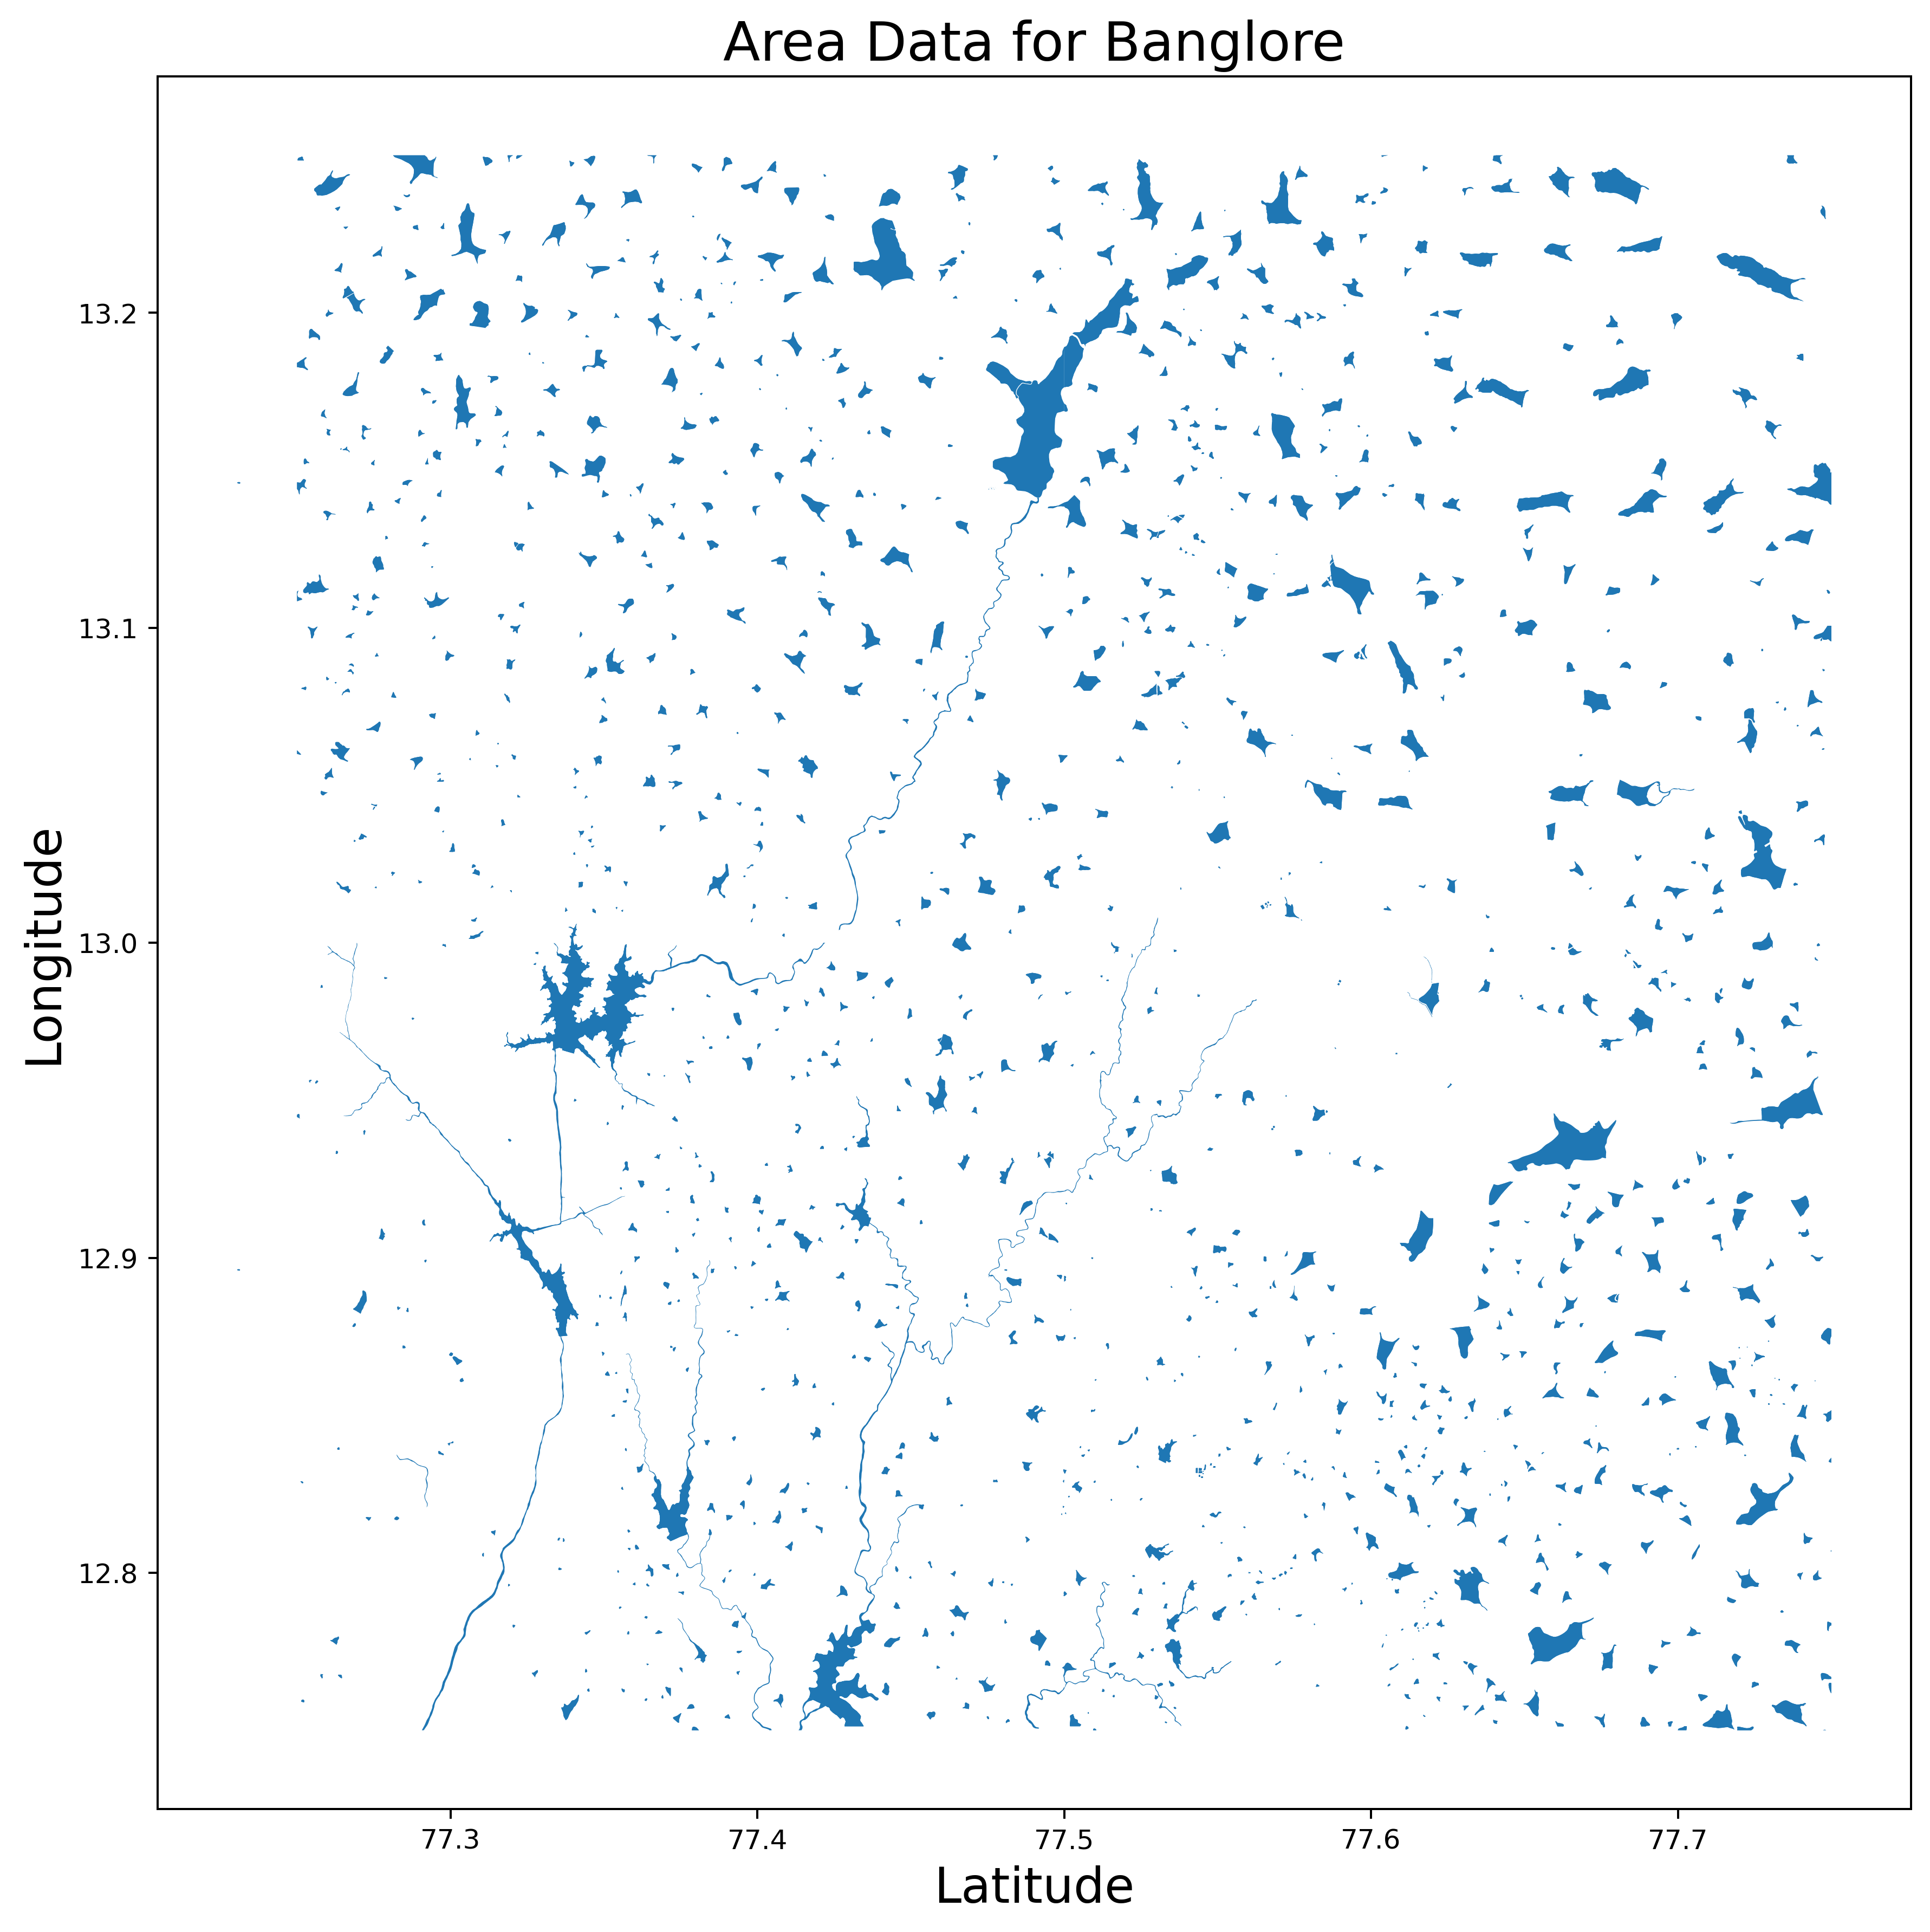

In [84]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.rcParams["figure.dpi"] = 360


df_A.plot()
plt.title('Area Data for Banglore', fontsize = 20)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)

Text(28.63531551837721, 0.5, 'Longitude')

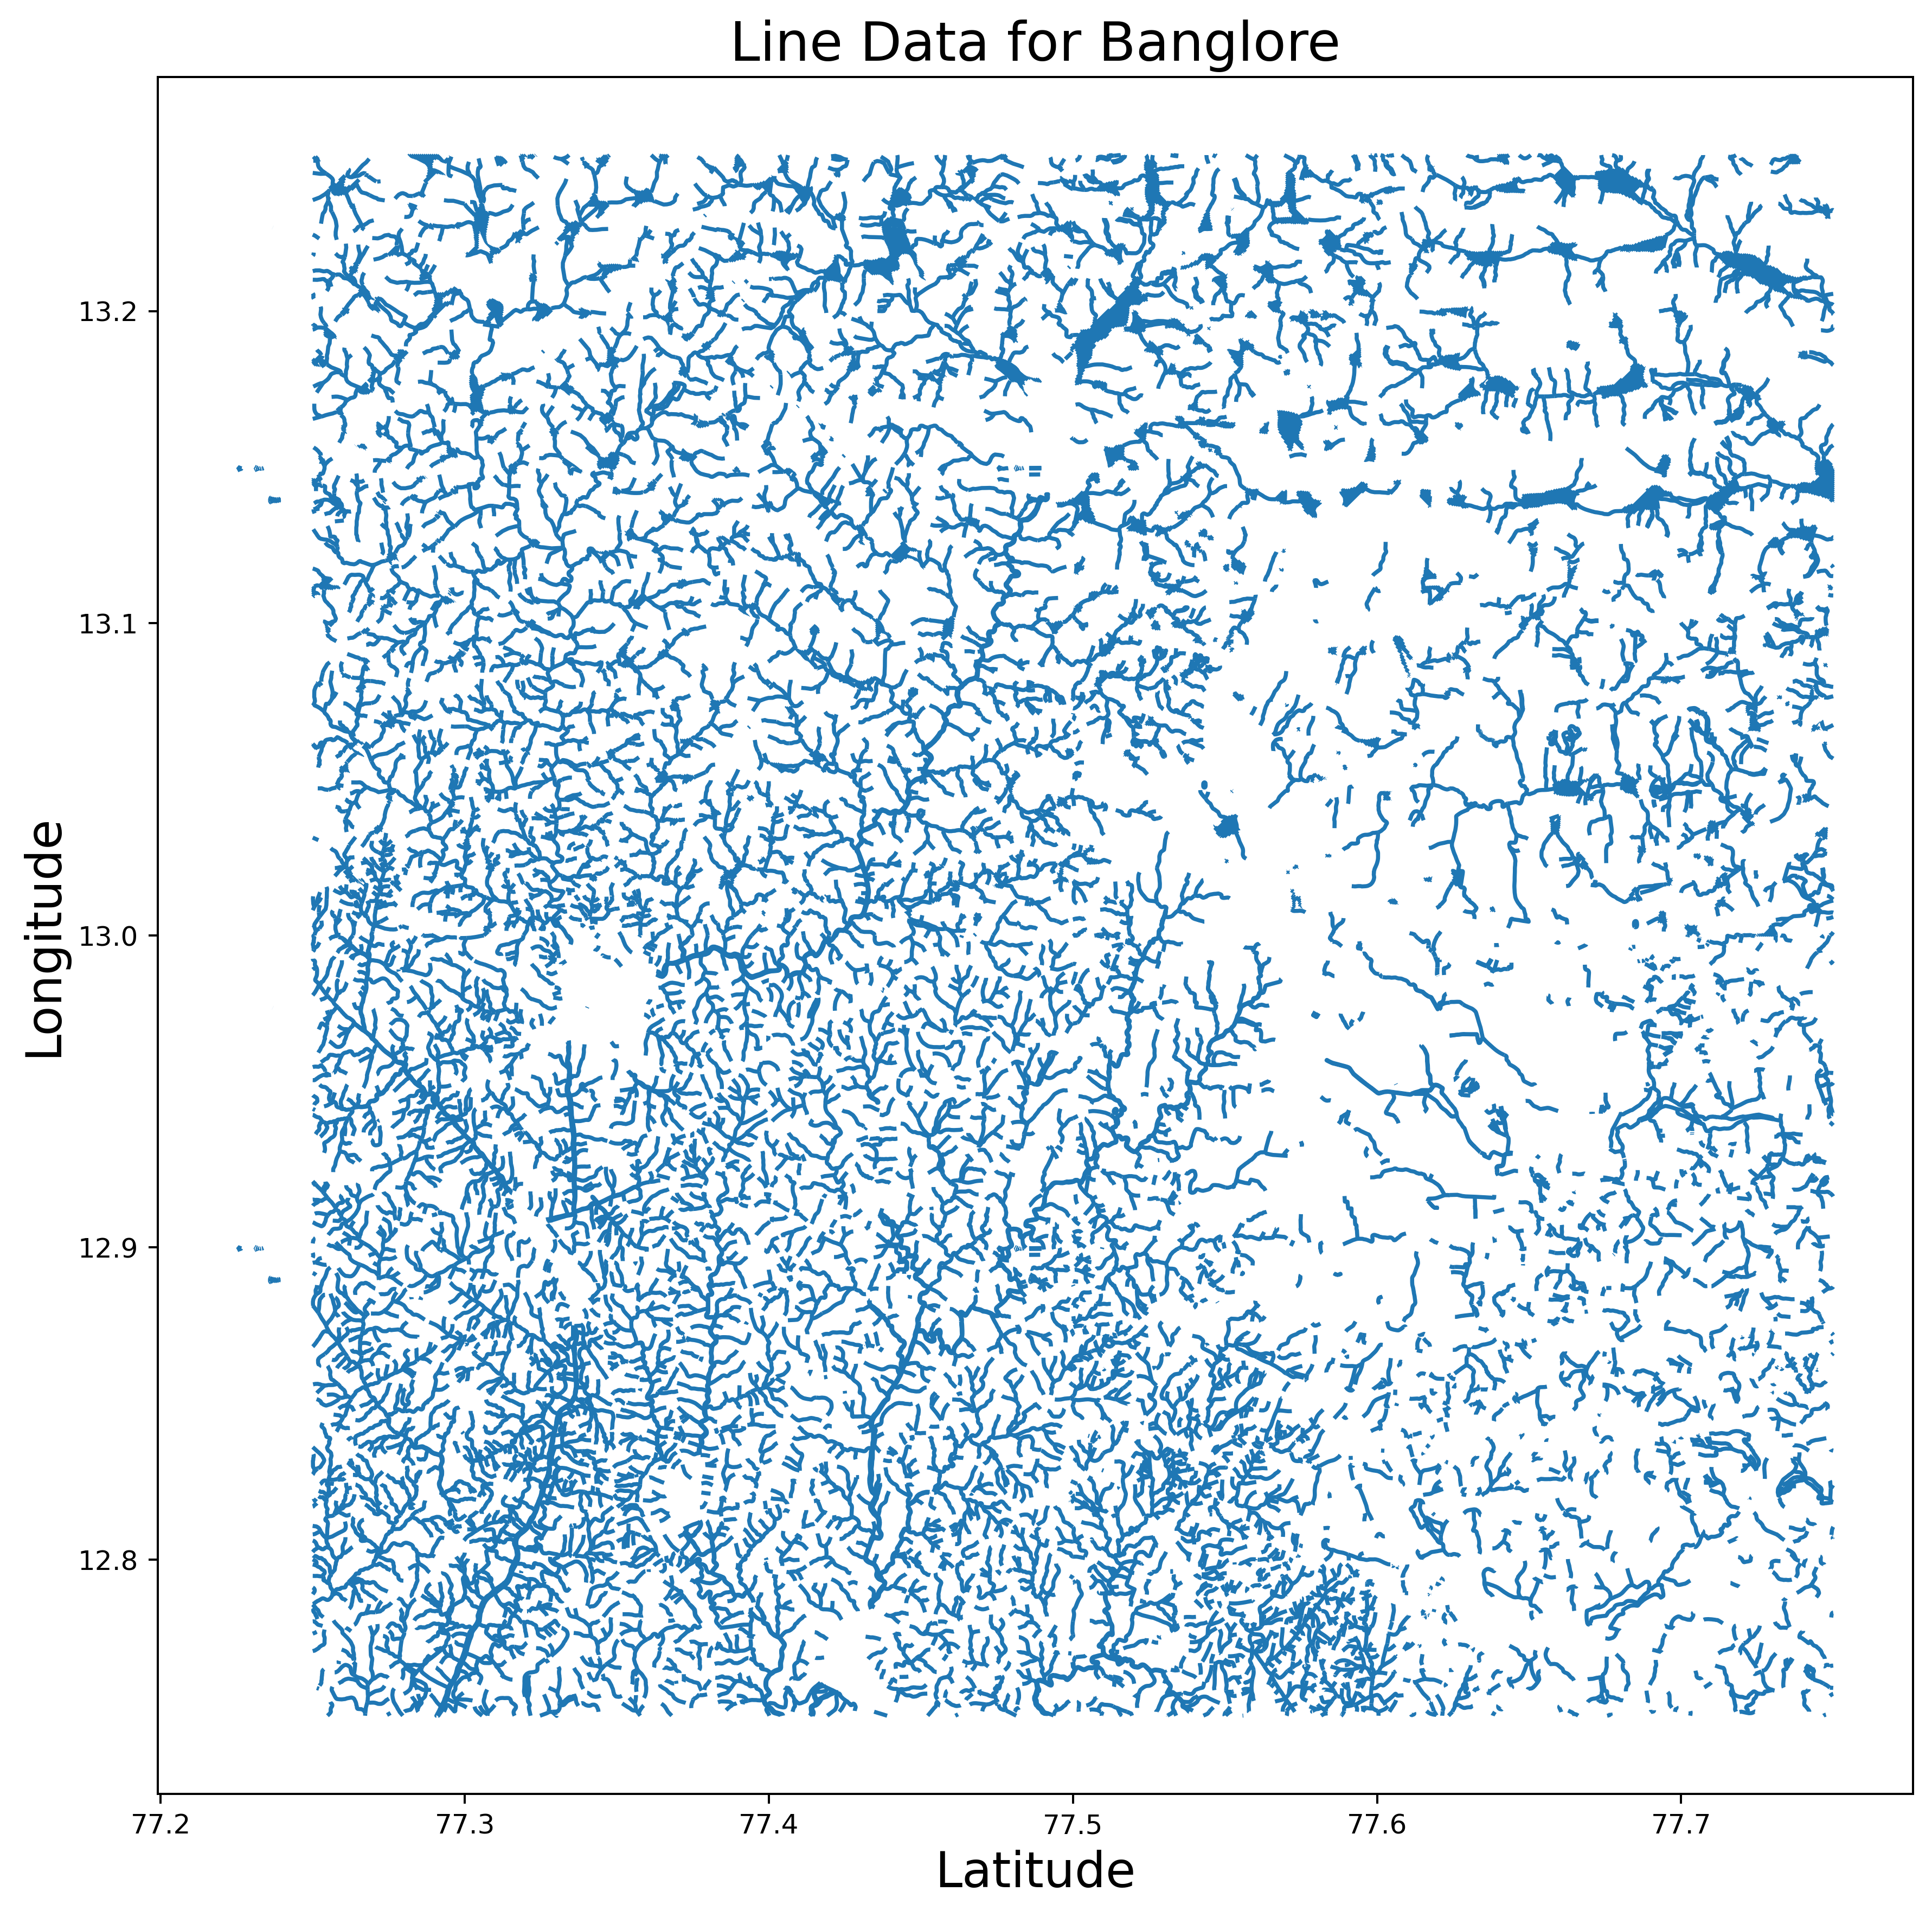

In [86]:
df_L.plot()
plt.title('Line Data for Banglore', fontsize = 20)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)

/Users/niranjan/opt/anaconda3/lib/python3.9/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


<AxesSubplot:>

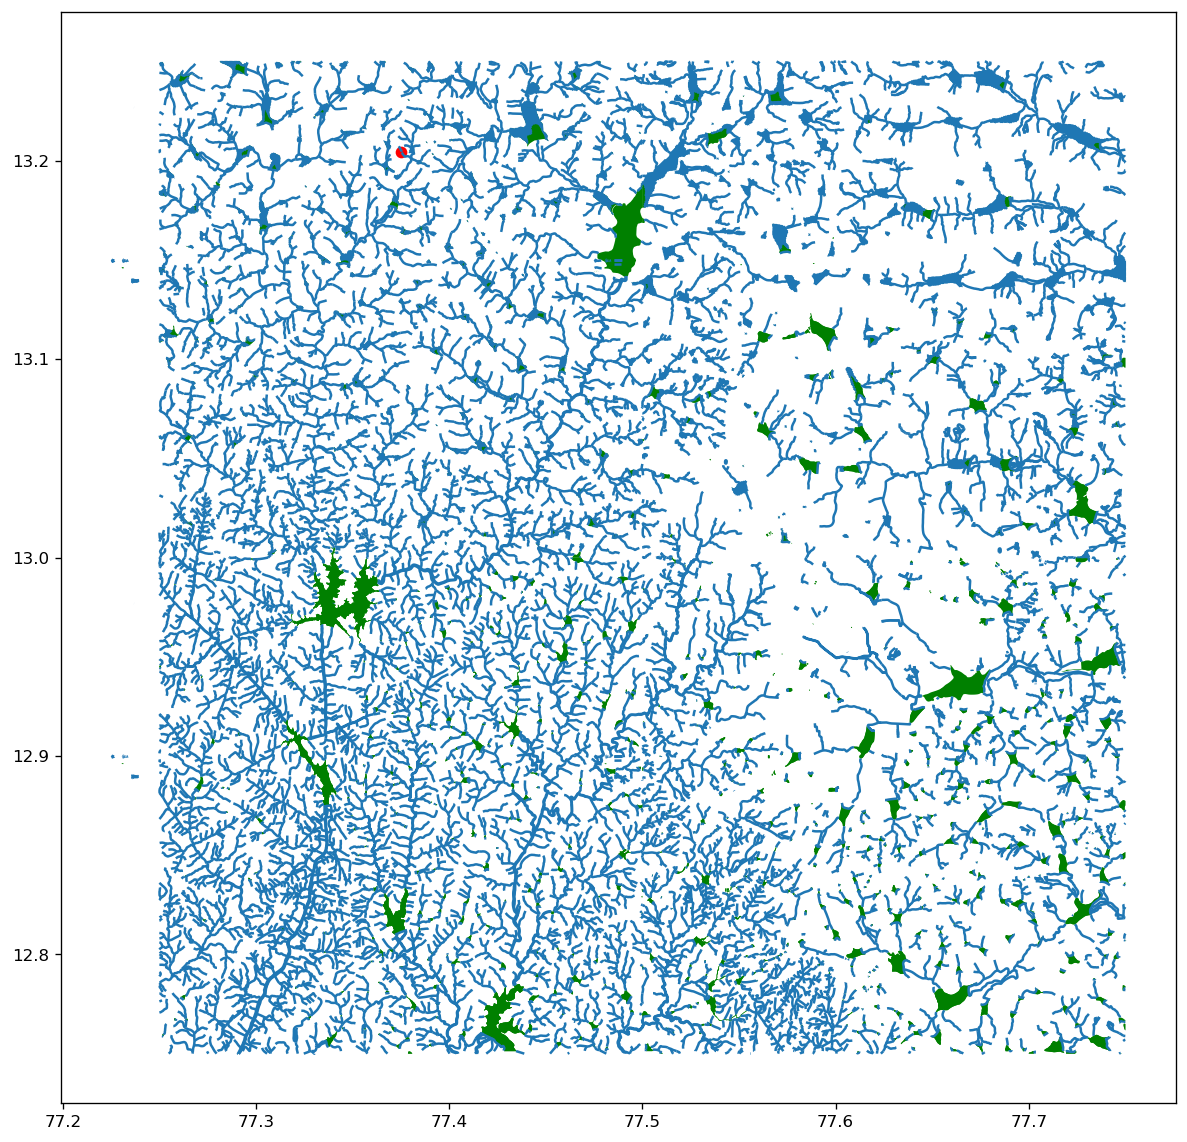

In [7]:
f, ax = plt.subplots()
df_L.plot(ax=ax)
df_A.plot(ax=ax, color = 'green')
df_A.intersection(df_L, align=True).plot(ax=ax, color = 'red')

In [8]:
over = gdp.overlay(df_L,df_A, how='intersection')
#for i in range(len(over['geometry'])):print(over['geometry'][i])

/var/folders/_1/mh7vhs1d5zz3475l0s3f31ww0000gn/T/ipykernel_2540/3675350821.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 4249 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  over = gdp.overlay(df_L,df_A, how='intersection')


In [9]:
intersect = gdp.sjoin(df_A,df_L, how='inner', predicate='intersects')

#f, ax = plt.subplots()
#df_L.plot(ax=ax)
#df_A.plot(ax=ax, color = 'red')
#intersect.plot(color = 'red')

/Users/niranjan/opt/anaconda3/lib/python3.9/site-packages/geopandas/array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


<AxesSubplot:>

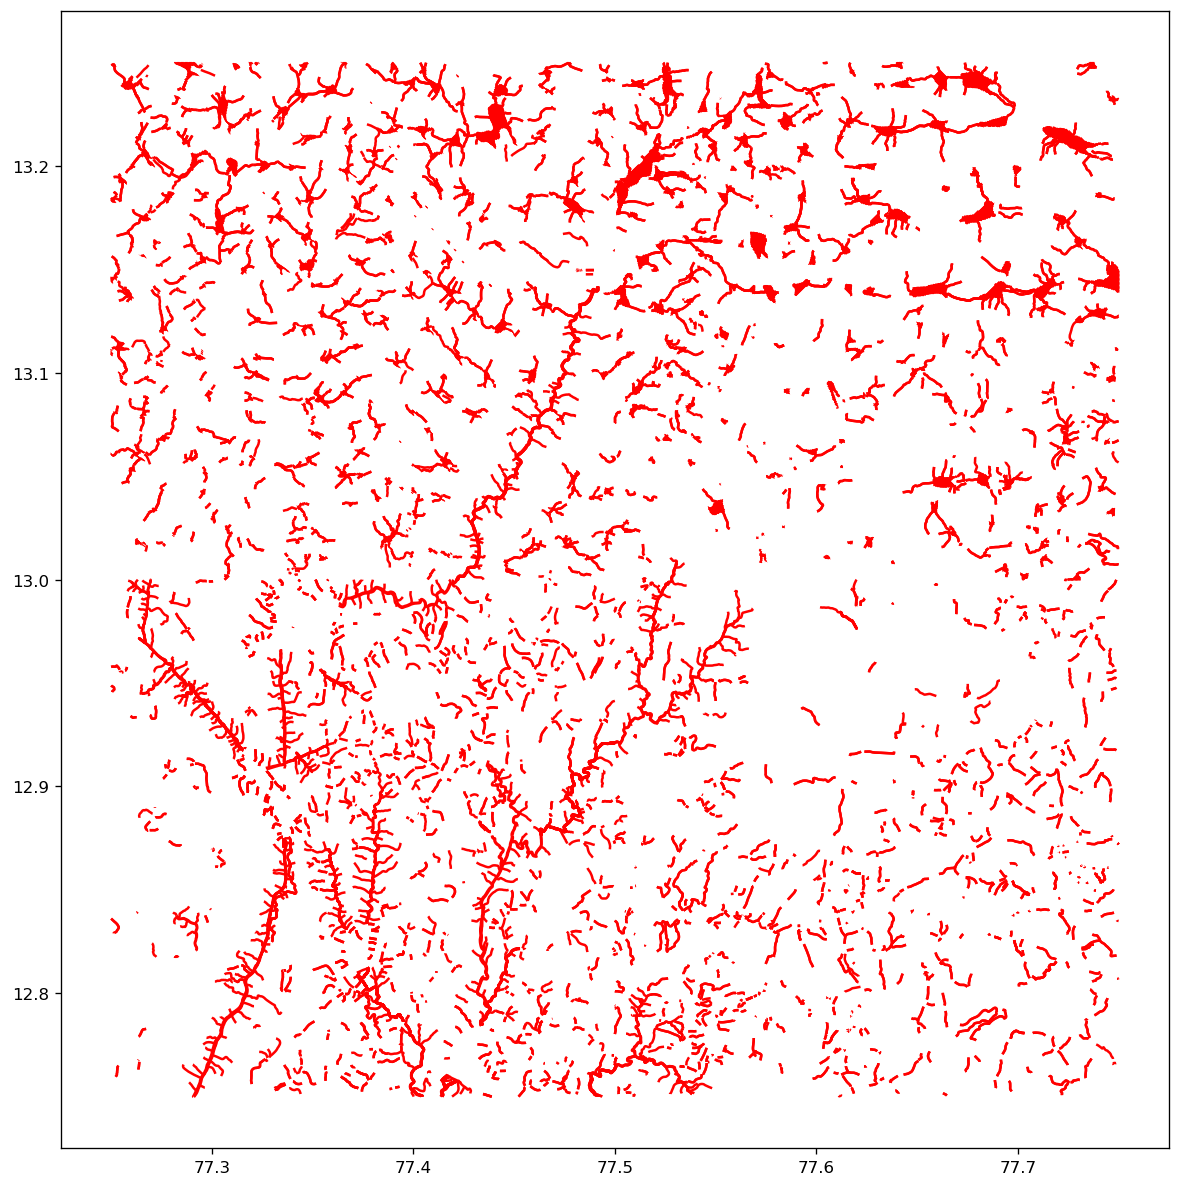

In [10]:
nearest = gdp.sjoin_nearest(df_L, df_A, max_distance = 0.0001, distance_col = "Distances")

#f, ax = plt.subplots()
#df_L.plot(ax=ax)
#df_A.plot(ax=ax, color = 'red')
nearest.plot(color = 'red')

In [87]:
Junction = np.empty(0,dtype = [('Name','U10'),('Elevation','f8'),('Depth-max','f8'),('Depth-Init','f8'),('Depth-surcharge','f8'),('Area-ponded','f8')])
k = 0
for i in range(len(df_L['geometry'])):
    for j in range(2):
        J = np.array([("J" + str(k),0.0,1,0.2,0,0)], dtype = [('Name','U10'),('Elevation','f8'),('Depth-max','f8'),('Depth-Init','f8'),('Depth-surcharge','f8'),('Area-ponded','f8')])
        Junction = np.append(Junction,J)
        k+=1
df_Junc = pd.DataFrame(Junction)

print(df_Junc)

         Name  Elevation  Depth-max  Depth-Init  Depth-surcharge  Area-ponded
0          J0        0.0        1.0         0.2              0.0          0.0
1          J1        0.0        1.0         0.2              0.0          0.0
2          J2        0.0        1.0         0.2              0.0          0.0
3          J3        0.0        1.0         0.2              0.0          0.0
4          J4        0.0        1.0         0.2              0.0          0.0
...       ...        ...        ...         ...              ...          ...
36491  J36491        0.0        1.0         0.2              0.0          0.0
36492  J36492        0.0        1.0         0.2              0.0          0.0
36493  J36493        0.0        1.0         0.2              0.0          0.0
36494  J36494        0.0        1.0         0.2              0.0          0.0
36495  J36495        0.0        1.0         0.2              0.0          0.0

[36496 rows x 6 columns]


In [75]:
Coordinates = np.empty(0,dtype = [('Name','U10'),('X-coordinate','f8'), ('Y-coordinate','f8')])
k=0
for i in range(len(df_L['geometry'])):
    coo = shp.get_coordinates(df_L['geometry'][i])
    X = np.array([coo[0,0],coo[-1,0]])
    Y = np.array([coo[0,1],coo[-1,1]])
    for j in range(2):
        C = np.array([("J" + str(k),X[j],Y[j])], dtype = [('Name','U10'),('X-coordinate','f8'), ('Y-coordinate','f8')])
        Coordinates = np.append(Coordinates,C)
        k+=1
#print(Coordinates)

conv_length = 1.11e5
df_lat = pd.DataFrame(Coordinates)
df_Coord = pd.DataFrame(Coordinates)

df_Coord.iloc[:,1] = df_Coord.iloc[:,1].mul(conv_length)
df_Coord.iloc[:,2] = df_Coord.iloc[:,2].mul(conv_length)
df_Coord.iloc[:,1] = df_Coord.iloc[:,1].sub(df_Coord['X-coordinate'].min())
df_Coord.iloc[:,2] = df_Coord.iloc[:,2].sub(df_Coord['Y-coordinate'].min())

print(df_Coord)

         Name  X-coordinate  Y-coordinate
0          J0      5.505900  44292.119696
1          J1    150.912671  44357.502077
2          J2      6.927772  44419.113170
3          J3    150.912671  44357.502077
4          J4    832.689830  44349.086530
...       ...           ...           ...
36491  J36491  37392.305306  17040.995588
36492  J36492  34738.671977    146.762987
36493  J36493  30503.806759   1482.813848
36494  J36494  35461.942952  26862.727589
36495  J36495  35740.325495  25305.878505

[36496 rows x 3 columns]


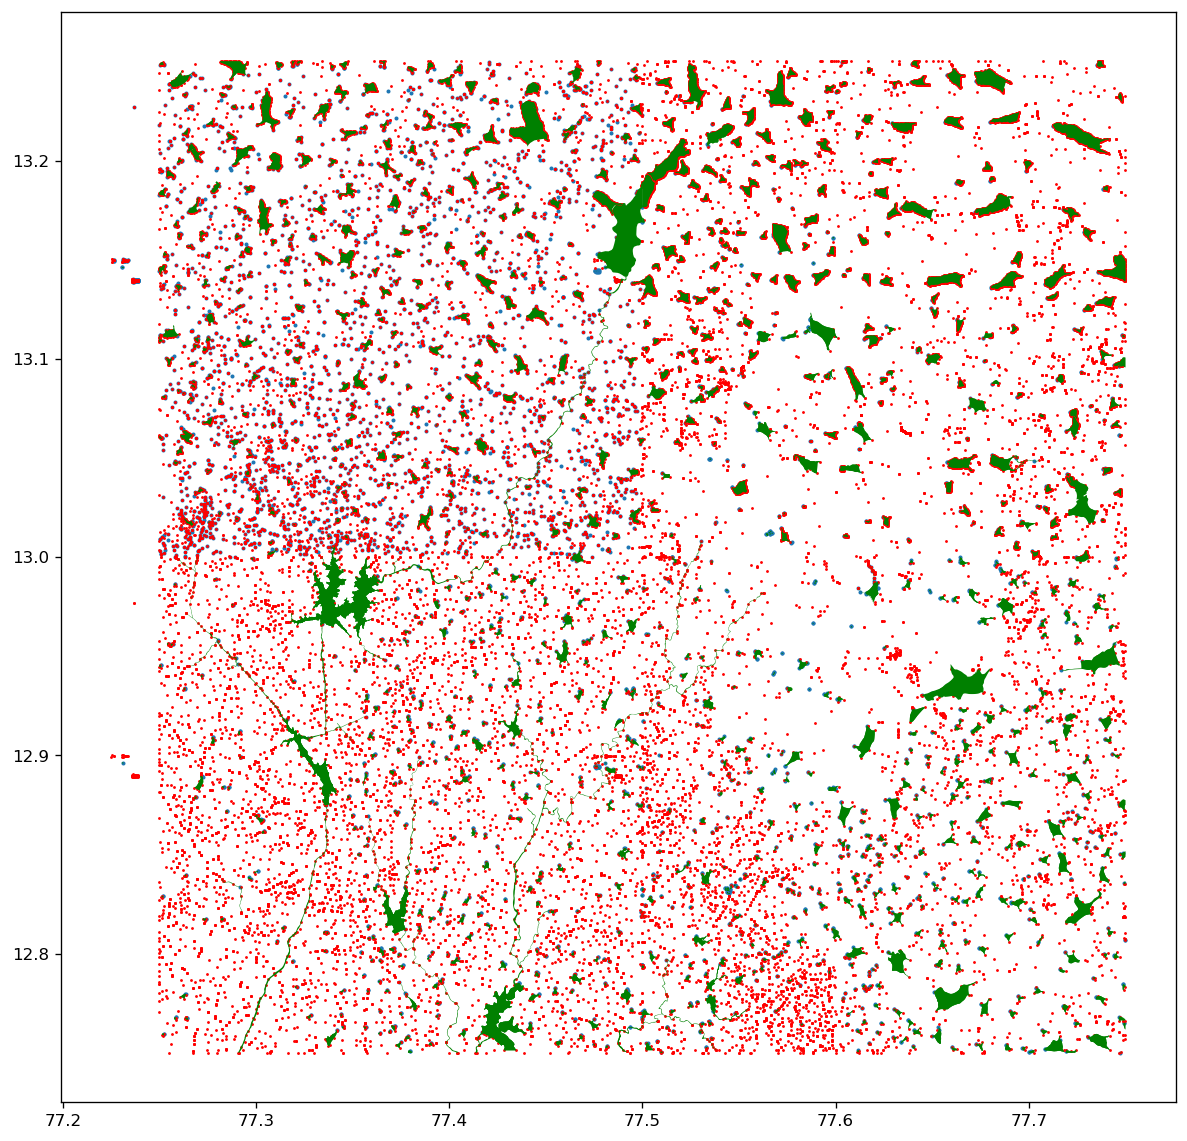

In [72]:
points = nearest_points(df_A['geometry'],df_L['geometry'])
#print(points)
xs = [point.x for point in points]
ys = [point.y for point in points]

f, ax = plt.subplots()
ax.scatter(xs, ys, s= 2)
ax.scatter(df_lat['X-coordinate'],df_lat['Y-coordinate'], s=0.5, color = 'red')
df_A.plot(ax=ax, color = 'green')
plt.show()

In [49]:
df_A['Centroid'] = df_A.centroid

Curve = np.empty(len(df_A['Centroid']),dtype = [('Name','U10'),('Kind','U10'), ('Coordinates','object')])
store_lat = shp.get_coordinates(df_A['Centroid'])
store_lat = store_lat*conv_length
store_lat[:,0] -= np.min(store_lat[:,0])
store_lat[:,1] -= np.min(store_lat[:,1])
Sub_Coord = tuple(map(tuple, store_lat))
for i in range(len(df_A['Centroid'])):Curve[i] = np.array([("SU" + str(i),"Storage",Sub_Coord[i])], dtype = [('Name','U10'),('Kind','U10'), ('Coordinates','object')])

df_Curve = pd.DataFrame(Curve)
print(df_Curve)

        Name     Kind                               Coordinates
0        SU0  Storage   (6.733797136694193, 43951.555071340874)
1        SU1  Storage   (6.733797136694193, 43951.555071340874)
2        SU2  Storage  (2244.3325733151287, 55365.815167239634)
3        SU3  Storage   (3292.1963435728103, 54435.27218075935)
4        SU4  Storage  (3585.2445229291916, 53617.168496705825)
...      ...      ...                                       ...
2934  SU2934  Storage      (54911.62698667124, 23036.108631643)
2935  SU2935  Storage    (54278.35611353628, 24176.89685489284)
2936  SU2936  Storage  (53547.006675980985, 25846.736480443273)
2937  SU2937  Storage   (44287.12794180587, 14128.539185376605)
2938  SU2938  Storage  (43622.329608557746, 11990.705690595089)

[2939 rows x 3 columns]


/var/folders/_1/mh7vhs1d5zz3475l0s3f31ww0000gn/T/ipykernel_2540/3158684943.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_A['Centroid'] = df_A.centroid


In [ ]:
Conduit = np.empty(len(df_Coord),dtype = [('Name','U10'),('Junc_in','U10'), ('Junc_out','U10'), ('length','f8'), ('Roughness','f8'), ('Elev_in','f8'), ('Elev_out','f8'), ('Flow_init','f8')])

for i in range(len(df_Coord)):
    Conduit[i] = np.array([("C" + str(i), df_Coord['Name'][i], df_Coord['Name'][i+1], )]
        dtype = [('Name','U10'),('Junc_in','U10'), ('Junc_out','U10'), ('length','f8'), ('Roughness','f8'), ('Elev_in','f8'), ('Elev_out','f8'), ('Flow_init','f8')])